In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [26]:
with open('intents.json') as file:
    data = json.load(file)

In [27]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [28]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)


In [29]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) # adding out of vocabulary token
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

# Train the Nueral Network

In [35]:
epochs = 550
train = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/550
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2/550
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 3/550
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 4/550
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/550
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/550
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/550
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/550
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/550
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 10/550
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 11/550
2/2 [===========

# Rate at which the Nueral Net is Learning

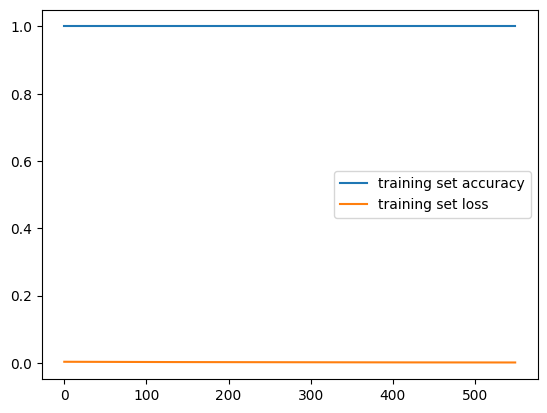

In [36]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [24]:
# saving model
model.save("chat_model")

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


INFO:tensorflow:Assets written to: chat_model\assets


# This is the chat function





In [37]:
def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
 
    while True:
        print("User: ")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        # print(result)
        for i in data['intents']:
            if i['tag'] == tag:
                print(F"ChatBot:", np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print("Start messaging with the bot (type quit to stop)!")
chat()

Start messaging with the bot (type quit to stop)!
User: 


 hello


1/1 [==============================] - 0s 69ms/step
ChatBot: Hello
User: 


 hello


1/1 [==============================] - 0s 22ms/step
ChatBot: Hi there
User: 


 hi hello


1/1 [==============================] - 0s 38ms/step
ChatBot: Hi there
User: 


 hello hello?


1/1 [==============================] - 0s 24ms/step
ChatBot: Hi
User: 


 how are you?


1/1 [==============================] - 0s 22ms/step
ChatBot: Yes please i am
User: 


 hope you good?


1/1 [==============================] - 0s 23ms/step
ChatBot: Am Trevor an AI chatbot here to help you.
User: 


 hope you fine


1/1 [==============================] - 0s 23ms/step
ChatBot: good n you
User: 


 hope you doing good


1/1 [==============================] - 0s 24ms/step
ChatBot: Yes please i am
User: 


 hope you good


1/1 [==============================] - 0s 24ms/step
ChatBot: I'm Trevor, an Artificial Intelligent bot
User: 


 you fine?


1/1 [==============================] - 0s 25ms/step
ChatBot: Am Trevor an AI chatbot here to help you.
User: 


 you good


1/1 [==============================] - 0s 23ms/step
ChatBot: My pleasure
User: 


 you good


1/1 [==============================] - 0s 24ms/step
ChatBot: You're most welcome!
User: 


 good


1/1 [==============================] - 0s 24ms/step
ChatBot: My pleasure
User: 


 goodmrng


1/1 [==============================] - 0s 23ms/step
ChatBot: Happy to help!
User: 


 hey


1/1 [==============================] - 0s 24ms/step
ChatBot: Hello
User: 


 how are you?


1/1 [==============================] - 0s 24ms/step
ChatBot: Yeah how are you
User: 


 am good too


1/1 [==============================] - 0s 24ms/step
ChatBot: You're most welcome!
User: 


 i need help


1/1 [==============================] - 0s 24ms/step
ChatBot: Yes Sure, How can I support you
User: 


 quit
